In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten ,Dense

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode='nearest',
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 325 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 54 images belonging to 2 classes.


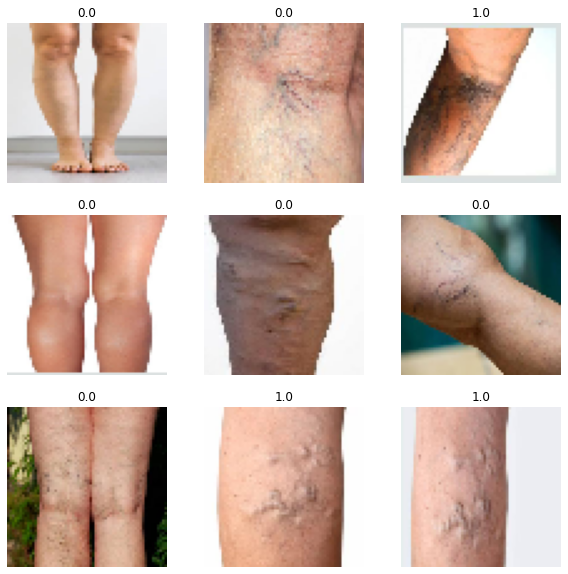

In [5]:
import matplotlib.pyplot as plt

images, labels = next(test_set)

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(str(labels[i]) if labels[i] == 0 else str(labels[i]))
    plt.axis('off')

plt.show()

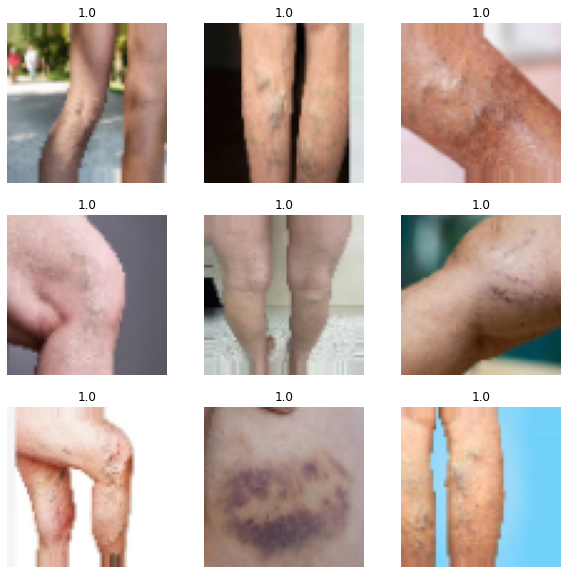

In [6]:
import matplotlib.pyplot as plt

images, labels = next(training_set )

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(str(labels[i]) if labels[i] == 0 else str(labels[i]))
    plt.axis('off')

plt.show()

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [9]:
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))


In [11]:
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [14]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
history=model.fit(x = training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
11/11 [==============================] - 3s 180ms/step - loss: 0.3467 - accuracy: 0.8985 - val_loss: 2.1115 - val_accuracy: 0.2778
Epoch 2/100
11/11 [==============================] - 2s 140ms/step - loss: 0.2810 - accuracy: 0.9231 - val_loss: 1.7597 - val_accuracy: 0.2778
Epoch 3/100
11/11 [==============================] - 2s 145ms/step - loss: 0.2852 - accuracy: 0.9231 - val_loss: 1.4782 - val_accuracy: 0.2778
Epoch 4/100
11/11 [==============================] - 2s 153ms/step - loss: 0.2701 - accuracy: 0.9231 - val_loss: 1.5248 - val_accuracy: 0.2778
Epoch 5/100
11/11 [==============================] - 2s 149ms/step - loss: 0.2261 - accuracy: 0.9231 - val_loss: 2.6987 - val_accuracy: 0.2778
Epoch 6/100
11/11 [==============================] - 2s 137ms/step - loss: 0.1968 - accuracy: 0.9231 - val_loss: 1.7966 - val_accuracy: 0.2778
Epoch 7/100
11/11 [==============================] - 2s 144ms/step - loss: 0.1441 - accuracy: 0.9323 - val_loss: 2.0118 - val_accuracy: 0.5556

Epoch 58/100
11/11 [==============================] - 2s 147ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 5.1807 - val_accuracy: 0.7407
Epoch 59/100
11/11 [==============================] - 2s 150ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 5.8616 - val_accuracy: 0.7407
Epoch 60/100
11/11 [==============================] - 2s 157ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 6.0709 - val_accuracy: 0.7407
Epoch 61/100
11/11 [==============================] - 2s 139ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 6.6204 - val_accuracy: 0.7407
Epoch 62/100
11/11 [==============================] - 2s 164ms/step - loss: 6.2383e-04 - accuracy: 1.0000 - val_loss: 6.4555 - val_accuracy: 0.7407
Epoch 63/100
11/11 [==============================] - 2s 139ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 6.5367 - val_accuracy: 0.7407
Epoch 64/100
11/11 [==============================] - 2s 136ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 6.7993 - val_accur

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [17]:
test_loss, test_acc = model.evaluate(test_set)
print(f"Test accuracy: {test_acc}")

2/2 [==============================] - 0s 54ms/step - loss: 8.8634 - accuracy: 0.7407
Test accuracy: 0.7407407164573669


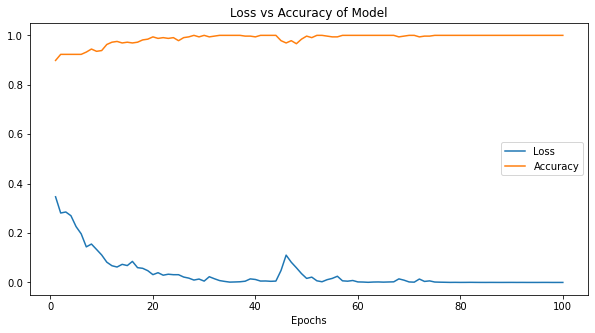

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, 101) 
plt.figure(figsize=(10, 5))
plt.title("Loss vs Accuracy of Model")
plt.plot(epochs, history.history['loss'][:200], label='Loss')
plt.plot(epochs, history.history['accuracy'][:200], label='Accuracy')
plt.grid()
plt.xlabel("Epochs")
plt.grid()
plt.legend()
plt.show()

In [20]:
import numpy as np
actual = np.empty(0)
pred = np.empty(0)
for i, (test_images, true_labels) in enumerate(test_set):
    predictions = model.predict(test_images)
    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]
    true_labels = [int(label) for label in true_labels]
    
    for true_label, binary_prediction in zip(true_labels, binary_predictions):
        label_string = 'Normal' if true_label == 1 else 'Vericose'
        prediction_string = 'Normal' if binary_prediction == 1 else 'Vericose'
        actual = np.append(actual,[label_string])
        pred = np.append(pred,[prediction_string])
        print(f"True Label: {label_string}, Predicted Label: {prediction_string}")

    if i == len(test_set) - 1:
        break  
print(actual)
print("\n\n\n\n")
print(pred)

1/1 [==============================] - 0s 115ms/step
True Label: Vericose, Predicted Label: Normal
True Label: Vericose, Predicted Label: Normal
True Label: Vericose, Predicted Label: Vericose
True Label: Normal, Predicted Label: Normal
True Label: Normal, Predicted Label: Normal
True Label: Normal, Predicted Label: Normal
True Label: Vericose, Predicted Label: Vericose
True Label: Normal, Predicted Label: Normal
True Label: Normal, Predicted Label: Normal
True Label: Vericose, Predicted Label: Vericose
True Label: Vericose, Predicted Label: Vericose
True Label: Vericose, Predicted Label: Normal
True Label: Vericose, Predicted Label: Normal
True Label: Vericose, Predicted Label: Vericose
True Label: Vericose, Predicted Label: Vericose
True Label: Vericose, Predicted Label: Vericose
True Label: Vericose, Predicted Label: Normal
True Label: Vericose, Predicted Label: Normal
True Label: Vericose, Predicted Label: Vericose
True Label: Vericose, Predicted Label: Vericose
True Label: Vericos

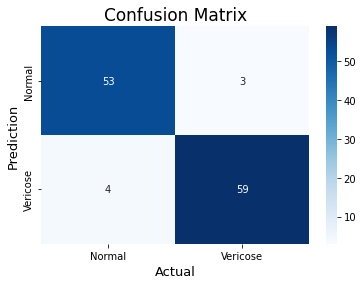

In [21]:

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
 
actual = np.array(
   ['Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose', 'Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal', 'Normal','Normal','Normal','Normal', 'Normal','Normal','Normal','Normal', 'Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal', 'Normal','Normal','Normal','Normal'])
pred= np.array(
    ['Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose', 'Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Vericose','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal', 'Normal','Normal','Normal','Normal', 'Normal','Normal','Normal','Normal', 'Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal','Normal', 'Normal','Vericose','Vericose','Vericose'])

cm = confusion_matrix(actual,pred)
     

sns.heatmap(cm, 
            annot=True,
           fmt='d', cmap='Blues' ,
            xticklabels=['Normal','Vericose'],
            yticklabels=['Normal','Vericose'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [22]:
import numpy as np
import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt
def predict_image(image_path):
    test_image = keras.utils.load_img(image_path, target_size = (64, 64))
    plt.imshow(test_image)
    test_image = keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        return 'vericose'
    else:
        return 'normal'


1/1 [==============================] - 0s 20ms/step


'normal'

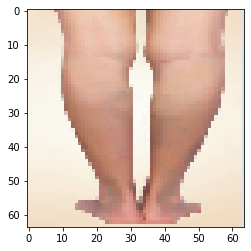

In [23]:
predict_image('dataset/test/normal/pic1.jpg')



1/1 [==============================] - 0s 21ms/step


'vericose'

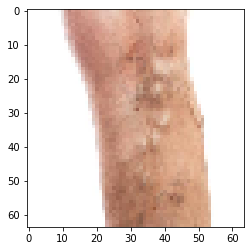

In [24]:
predict_image('dataset/valid/10_png.rf.44bdc1dc57f6c92ad02fff3c7f5b0958.jpg')

In [25]:
model.save('VericoseVeins.h5')